In [69]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from helper import draw_graph, clear_marks

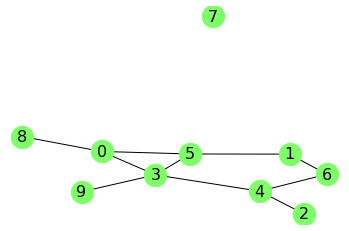

In [70]:
G = nx.gnm_random_graph(10, 20)
G = nx.erdos_renyi_graph(10, 0.3)
draw_graph(G)

In [84]:
def dfs_recursive(G, node):
    G.nodes[node]['marked'] = True
    for neighbor in G.adj[node]:
        if not G.nodes[neighbor].get('marked'):
            print(f'marking edge: ({node}, {neighbor})')
            G.edges[node, neighbor]['marked'] = True
            dfs(G, neighbor)

def dfs_iterative(graph, node):
    stack = deque()
    stack.append(node)
    while stack:
        print(stack)
        node = stack.pop()
        
        
        if not graph.nodes[node]['marked']:
            graph.nodes[node]['marked'] = True
            
        for neighbor in graph.adj[node]:
            print(neighbor, graph.nodes[neighbor].get('marked'))
            if not graph.nodes[neighbor]['marked']:
                #graph.edges[node, neighbor]['marked'] = True
                #print(f'marking edge: ({node}, {neighbor})')
                graph.nodes[nieg]['marked'] = True
                stack.append(neighbor)

In [85]:
clear_marks(G)
dfs_iterative(G, 0)


deque([0])
3 False
5 False
8 False
deque([3, 5, 8])
0 True
deque([3, 5])
0 True
1 False
3 False
deque([3, 1, 3])
0 True
4 False
5 True
9 False
deque([3, 1, 4, 9])
3 True
deque([3, 1, 4])
2 False
3 True
6 False
deque([3, 1, 2, 6])
1 False
4 True
deque([3, 1, 2, 1])
5 True
6 True
deque([3, 1, 2])
4 True
deque([3, 1])
5 True
6 True
deque([3])
0 True
4 True
5 True
9 True


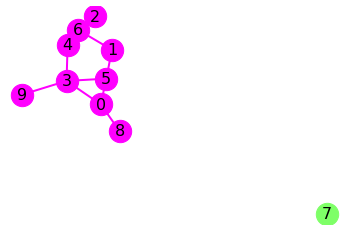

In [79]:

draw_graph(G)